In [1]:
#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np

#relevant ML libraries
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
pre = pd.read_csv('./datasets/comparison_feature_data/train_pre_gold.csv')
mid = pd.read_csv('./datasets/comparison_feature_data/train_mid_gold.csv')
late = pd.read_csv('./datasets/comparison_feature_data/train_late_gold.csv')

# pre_all = pd.read_csv('./datasets/all_feature_data/train_pre.csv')
# mid_all = pd.read_csv('./datasets/all_feature_data/train_mid.csv')
# late_all = pd.read_csv('./datasets/all_feature_data/train_late.csv')

In [3]:
def runModel(data_train,max_depth):
    X_train, Y_train = data_train.drop(['TeamVictory'],axis=1),data_train[['TeamVictory']]
    #Creating a copy of data
    X_scale = X_train.copy()
    #Scaling
    scaler = StandardScaler()
    scaler.fit(X_scale)
    X_scale = pd.DataFrame(scaler.transform(X_scale),columns= X_scale.columns )
    train_X, test_X, train_Y, test_Y = train_test_split(X_scale, Y_train, test_size = 0.2, random_state = 0)
    #fit model
    DCT = DecisionTreeClassifier(max_depth=max_depth)
    DCT.fit(train_X,train_Y)
    y_predict = DCT.predict(test_X)
    return DCT

In [4]:
#Grid Search
X_train, Y_train = mid.drop(['TeamVictory'],axis=1),mid[['TeamVictory']]
#Creating a copy of data
X_scale = X_train.copy()
#Scaling
scaler = StandardScaler()
scaler.fit(X_scale)
X_scale = pd.DataFrame(scaler.transform(X_scale),columns= X_scale.columns )
train_X, test_X, train_Y, test_Y = train_test_split(X_scale, Y_train, test_size = 0.2, random_state = 0)

param_grid = [
        {
            'max_depth' : range(1,20),
            
        }
       ]

clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3,
                           scoring='accuracy')
clf.fit(train_X,train_Y)


print("Best parameters set found on development set:")
print(clf.best_params_)

Best parameters set found on development set:
{'max_depth': 1}


In [5]:
runModel(pre,3)
runModel(mid,3)
runModel(late,3)

DecisionTreeClassifier(max_depth=3)

In [6]:
# import time

# feature_names = [train_X.columns[range(0,11)]]
# start_time = time.time()
# importances = RDF.feature_importances_
# std = np.std([tree.feature_importances_ for tree in RDF.estimators_], axis=0)
# elapsed_time = time.time() - start_time
# forest_importances = pd.Series(importances, index=feature_names)

# fig, ax = plt.subplots()
# forest_importances.plot.bar(yerr=std, ax=ax)
# ax.set_title("Feature importances using MDI")
# ax.set_ylabel("Mean decrease in impurity")
# fig.tight_layout()

In [7]:
# DCT = DecisionTreeClassifier(max_depth=1)
# DCT.fit(train_X,train_Y)
# y_predict = DCT.predict(test_X)

# print(classification_report(y_true=test_Y,y_pred=y_predict))

# #plot the decision tree with unlimited max depth
# plt.figure()
# plt.figure(dpi=800,figsize=(8,5))
# plot_tree(DCT, filled=True,feature_names=list(train_X.columns))
# plt.title("Decision tree trained after pruning")
# plt.show()

In [8]:
# runModel(pre_all,3)
# runModel(mid_all,3)
# runModel(late_all,3)

In [9]:
df_pre = pd.read_csv('./predict_pre.csv')
df_late = pd.read_csv('./predict_late.csv')


In [10]:
df_pre = df_pre.drop(['TeamVictory'],axis=1)
df_late = df_late.drop(['TeamVictory'],axis=1)

In [11]:
model = runModel(pre,3)

In [12]:
model.predict(df_late)

array([100, 200, 200], dtype=int64)

In [13]:
# #Grid Search
# X_train, Y_train = pre.drop(['TeamVictory'],axis=1),pre[['TeamVictory']]
# #Creating a copy of data
# X_scale = X_train.copy()
# #Scaling
# scaler = StandardScaler()
# scaler.fit(X_scale)
# X_scale = pd.DataFrame(scaler.transform(X_scale),columns= X_scale.columns )
# train_X, test_X, train_Y, test_Y = train_test_split(X_scale, Y_train, test_size = 0.2, random_state = 0)


# param_grid = [
#         {
#             'n_estimators' : range(10,101,10),
#             'max_depth' : range(5,15),
#             'min_samples_leaf' : range(5,15),
            
#         }
#        ]

# clf = GridSearchCV(RandomForestClassifier(), param_grid, cv=3,
#                            scoring='accuracy')
# clf.fit(train_X,train_Y.values.ravel())


# print("Best parameters set found on development set:")
# print(clf.best_params_)

Best parameters set found on development set:
{'max_depth': 5, 'min_samples_leaf': 13, 'n_estimators': 60}


In [16]:
RDF = RandomForestClassifier(max_depth=5, n_estimators=60)
RDF.fit(train_X,train_Y.values.ravel())

RandomForestClassifier(max_depth=5, n_estimators=60)

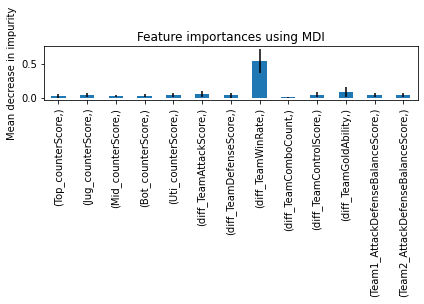

In [18]:
import time

feature_names = [train_X.columns[range(0,13)]]
start_time = time.time()
importances = RDF.feature_importances_
std = np.std([tree.feature_importances_ for tree in RDF.estimators_], axis=0)
elapsed_time = time.time() - start_time
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
print(list(runModel(pre,3).predict(df_pre)))
print(list(runModel(late,3).predict(df_late)))